## Plot bathymtery in the Cape Verde Region

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import xarray as xr
import cmocean.cm as cmo

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [3]:
yCV = range(1002-100,1107+100)
xCV = range(1447-120,1532+120)

path ='/gxfs_work/geomar/smomw355/model_data/ocean-only/VIKING20X.L46-KFS003/nemo/suppl/1_mesh_mask.nc'
dsM = xr.open_dataset(path).squeeze().rename({'z':'deptht'}).isel(x=xCV,y=yCV)

In [4]:
## depth of the sea-floor in the model
sfl = (dsM.e3t_0 * dsM.tmask).sum('deptht').compute()

In [5]:
coastline = cft.GSHHSFeature(scale='intermediate')

def plot_cartopy(ax, xticks, yticks, ylabels=True, xlabels=True, continents=True):
    '''Add cartopy features to the map'''
    if continents:
       ax.add_feature(coastline, edgecolor='darkgrey', facecolor='k', zorder=100)

    ## add labels
    ax.set_xticks(xticks, crs = ccrs.PlateCarree())
    ax.set_yticks(yticks, crs = ccrs.PlateCarree())
    if xlabels:
      lon_formatter = LongitudeFormatter()
      ax.xaxis.set_major_formatter(lon_formatter)
    else: 
       ax.set_xticklabels([])
    if ylabels:
      lat_formatter = LatitudeFormatter()
      ax.yaxis.set_major_formatter(lat_formatter)
    else: 
       ax.set_yticklabels([])

/gxfs_work/geomar/smomw379/miniconda3/envs/py3_mhw/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1604: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/gxfs_work/geomar/smomw379/miniconda3/envs/py3_mhw/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1655: UserWarning: The following kwargs were not used by contour: 'lw'
  result = super().contourf(*args, **kwargs)


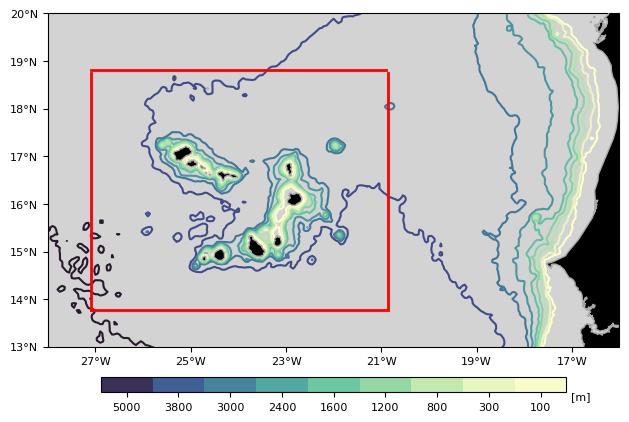

In [14]:
fig = plt.figure(figsize=(7.,4.5))
ax=fig.add_axes([0.0,0.0,0.95,0.95], projection=ccrs.PlateCarree())
ax.set_extent([-28,-16,13,20])
#ax.contourf(dsM.nav_lon, dsM.nav_lat, -sfl, cmap=cmo.deep_r, levels=np.arange(-5000,1,400))
ax.contourf(dsM.nav_lon, dsM.nav_lat, np.zeros(sfl.shape), colors='lightgrey')

ax.contour(dsM.nav_lon, dsM.nav_lat, -sfl, cmap=cmo.deep_r, linestyles='-', levels=[-5000,-3800,-3000,-2400,-1600,-1200,-800,-300,-100],
linewidth=1)

ctlabel = ax.contourf(-sfl, cmap=cmo.deep_r, levels=[-5000,-3800,-3000,-2400,-1600,-1200,-800,-300,-100,0], lw=20)

plot_cartopy(ax,xticks=np.arange(-27,-15,2), yticks=np.arange(13,21,1))

plt.plot(dsM.nav_lon[100,100:-100], dsM.nav_lat[100,100:-100], color='r', lw=2)
plt.plot(dsM.nav_lon[-100,100:-100], dsM.nav_lat[-100,100:-100], color='r', lw=2)
plt.plot(dsM.nav_lon[100:-100,100], dsM.nav_lat[100:-100,100], color='r', lw=2)
plt.plot(dsM.nav_lon[100:-100,-100], dsM.nav_lat[100:-100,-100], color='r', lw=2)

cb = plt.colorbar(ctlabel, orientation='horizontal', shrink=0.7, pad=0.07, aspect=30)
cb.set_ticks([-4400,-3400,-2700,-2000,-1400,-1000,-550,-200,-50])
cb.set_ticklabels([5000,3800,3000,2400,1600,1200,800,300,100])
cb.set_label('[m]', x=1.03, labelpad=-15, fontsize=8)

plt.savefig('CapeVerde_Bathy.png', dpi=300)

## Save data for publication

In [23]:
sfl_xr = sfl.assign_coords({'nav_lat':dsM.nav_lat, 'nav_lon':dsM.nav_lon})
sfl_xr.attrs['long_name'] = 'Depth of the seafloor in model'
sfl_xr.attrs['units'] = 'm'

In [24]:
ds_out = xr.Dataset(data_vars={'seafloor':sfl_xr})

In [29]:
## set global attributes
ds_out.attrs['title'] = 'Depth of the seafloor in VIKING20X (Cape Verde Archipelago)'
ds_out.attrs['institution'] = 'GEOMAR Helmholtz Centre for Ocean Research Kiel'
ds_out.attrs['creator_name'] = 'Tobias Schulzki'
ds_out.attrs['creator_email'] = 'tschulzki@geomar.de'
ds_out.attrs['creator_url'] = 'orcid.org/0000-0002-3480-8492'
ds_out.attrs['license'] = 'CC BY 4.0  (https://creativecommons.org/licenses/by/4.0/deed.en)'
ds_out.attrs['keywords'] = 'Temperature, marine heatwaves, VIKING20X, numerical model'
ds_out.attrs['summary'] = 'Created in 8_BathymetryMap.ipynb'
ds_out.attrs['cdm_data_type'] = 'grid'
ds_out.attrs['processing_level'] = 'Level 4 (numerical simulation output)'
ds_out.attrs['source'] = 'VIKING20X'
ds_out.attrs['pi'] = 'Tobias Schulzki'
ds_out.attrs['pi_contact'] = 'tschulzki@geomar.de'
ds_out.attrs['pi_url'] = 'orcid.org/0000-0002-3480-8492'
ds_out.attrs['institution_id'] = 'https://ror.org/02h2x0161'
ds_out.attrs['research_devision'] = 'Ocean Circulation and Climate Dynamics'
ds_out.attrs['research_unit'] = 'Ocean Dynamics'
ds_out.attrs['project'] = 'iAtlantic, METAscales'
ds_out.attrs['date_created'] = '2025-01-16'
ds_out.attrs['date_modified'] = '2025-01-16'
ds_out.attrs['publisher_name'] = 'GEOMAR Helmholtz Centre for Ocean Research Kiel'
ds_out.attrs['publisher_email'] = 'datamanagement@geomar.de'
ds_out.attrs['naming_authority'] = 'de.geomar'

In [30]:
outpath = '/gxfs_work/geomar/smomw379/Publications/Schulzki2025_MHWs/DATA/'
ds_out.to_netcdf(outpath+'Schulzki_et_al_2025_Figure08.nc')